Intsalling opendatasets to download kaggel dataset

In [1]:
!pip install opendatasets

Importing Library

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import opendatasets
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
import cv2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


downloading dataset from Kaggel

In [3]:
opendatasets.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: avdheshprajapati
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:13<00:00, 83.2MB/s]


Loading Images with batch size 32 and image size 256*256

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs-vs-cats/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogs-vs-cats/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


there are 20000 images in train and 5000 images in test

In [17]:
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels.shape)
    print(images[0])
    print(labels[0])

(32, 256, 256, 3)
(32,)
tf.Tensor(
[[[111.58983  139.58983  186.58983 ]
  [129.08087  157.77814  202.68634 ]
  [112.72316  141.72316  183.72316 ]
  ...
  [118.60324  139.60324  170.60324 ]
  [105.47786  126.47786  157.47786 ]
  [126.21035  147.21036  178.21036 ]]

 [[133.35417  161.35417  208.35417 ]
  [109.5786   138.27586  183.18407 ]
  [ 87.36007  116.36007  158.36008 ]
  ...
  [137.64883  158.64883  189.64883 ]
  [122.11302  143.11302  174.11302 ]
  [133.57863  154.57863  185.57863 ]]

 [[123.2142   151.2142   198.2142  ]
  [107.92644  136.6237   181.5319  ]
  [122.8295   151.8295   193.8295  ]
  ...
  [126.85164  146.85164  179.85164 ]
  [114.629944 134.62994  167.62994 ]
  [138.26694  158.26694  191.26694 ]]

 ...

 [[137.51187  136.51187  132.51187 ]
  [127.61636  126.61636  122.61636 ]
  [122.80823  121.80823  117.80823 ]
  ...
  [126.390114 149.3901   191.3901  ]
  [144.4307   167.4307   209.4307  ]
  [172.97188  195.97188  237.97188 ]]

 [[137.29433  130.98964  127.98964 ]
  

Display image

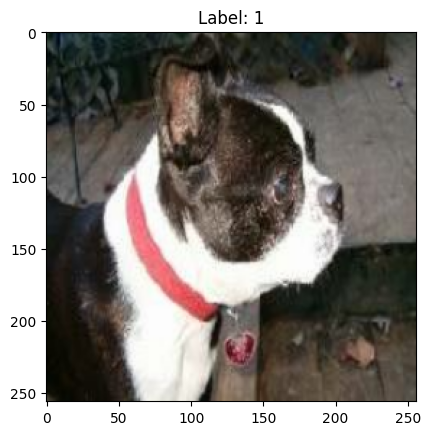

In [13]:
for images, labels in train_ds.take(1):
    plt.imshow(images[0].numpy().astype("uint8"))  # Convert tensor to numpy
    plt.title(f"Label: {labels[0].numpy()}")  # Show label as title
    plt.axis("on")
    plt.show()


In [ ]:
# Normalizaton
def process(image, label):
  image = tf.cast(image/255,tf.float32)
  return image, label

  train_ds = train_ds.map(process)
  test_ds = test_ds.map(process)


*   Adding CNN layers with filters 32, 64, 128.
*   Input shape is (256,256,3) because images is rgb.
*   Using batch normalization and dropout to prevent overrfitting
*   Adding maxpool layers to reduce image size
*   Adding 2 fully connected layer and one output layer

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size = (3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(filters=64, kernel_size = (3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(filters=128, kernel_size = (3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation = "sigmoid"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

Using binary crossentropy loss function for binary classification problem

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
hist = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 76ms/step - accuracy: 0.5497 - loss: 2.3776 - val_accuracy: 0.5272 - val_loss: 0.6769
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.6239 - loss: 0.6375 - val_accuracy: 0.6420 - val_loss: 0.6114
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.7002 - loss: 0.5685 - val_accuracy: 0.7506 - val_loss: 0.5080
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7410 - loss: 0.5021 - val_accuracy: 0.6892 - val_loss: 0.6070
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.7874 - loss: 0.4304 - val_accuracy: 0.7650 - val_loss: 0.4852
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.8151 - loss: 0.3718 - val_accuracy: 0.6844 - val_loss: 0.6128
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.8292 - loss: 0.3293 - val_accuracy: 0.7542 - val_loss: 0.6182
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.8530 - loss: 0.2828 - 

There are 625 batch and one batch is of 32 images

Before adding batch normalization and dropout

<function matplotlib.pyplot.show(close=None, block=None)>

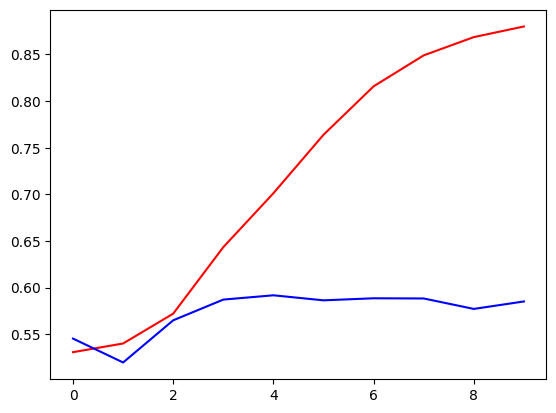

In [ ]:
plt.plot(hist.history["accuracy"],color="red",label="train")
plt.plot(hist.history["val_accuracy"],color="blue",label="validation")
plt.show


Training data giving more that 85% accuracy but test data give 60% accuracy seems like overfitting

after adding batch normalization and dropout

<function matplotlib.pyplot.show(close=None, block=None)>

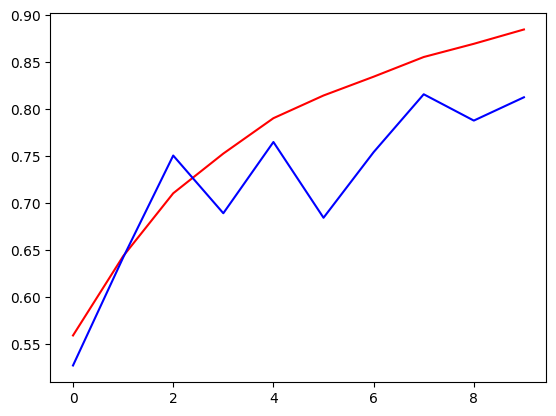

In [ ]:
plt.plot(hist.history["accuracy"],color="red",label="train")
plt.plot(hist.history["val_accuracy"],color="blue",label="validation")
plt.show

Before adding batch normalization and dropout

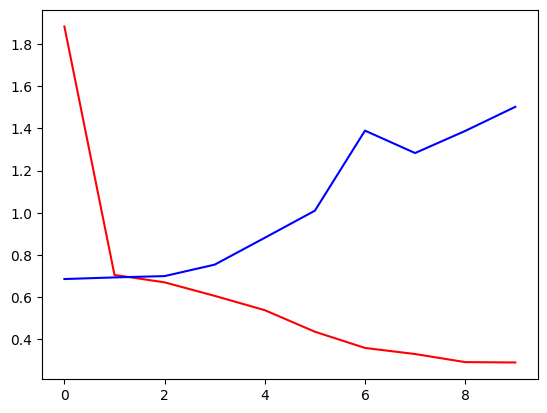

In [ ]:
plt.plot(hist.history["loss"],color="Red",label="train_loss")
plt.plot(hist.history["val_loss"],color="blue",label="validation_loss")
plt.show()

training data reduce loss while test data increase

after adding batch normalization and dropout

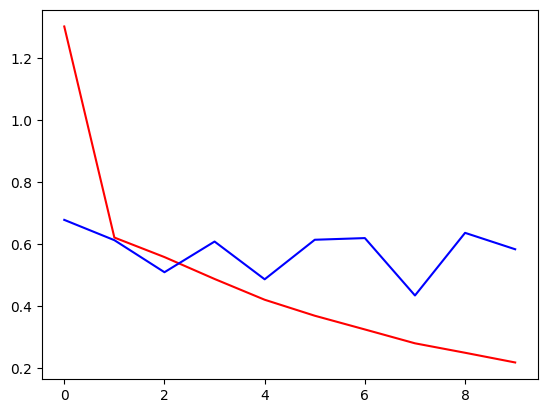

In [ ]:
plt.plot(hist.history["loss"],color="Red",label="train_loss")
plt.plot(hist.history["val_loss"],color="blue",label="validation_loss")
plt.show()

reading new image for testing model

In [ ]:
test_image = cv2.imread("/content/golden-retriever-tongue-out.jpg")

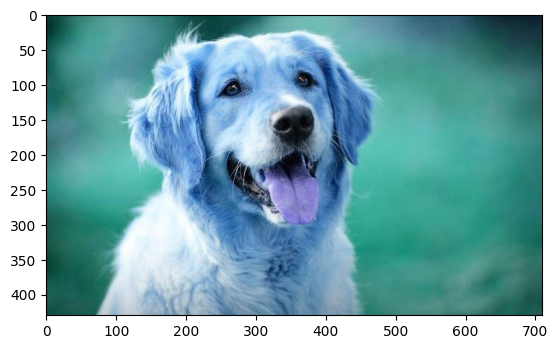

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(430, 710, 3)

dog image is size of 430*710

In [ ]:
test_image = cv2.resize(test_image,(256,256))

In [ ]:
test = test_image.reshape((1,256,256,3))

resize and reshaping image

In [ ]:
if model.predict(test) < 0.5:
  print("cat")

else:
  print("dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
dog


In [ ]:
model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.52445394]], dtype=float32)

Model is working well